In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movies/tmdb_movies.ipynb
/kaggle/input/tmdb-movies/tmdb_movies.csv


In [2]:
# Importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading dataset
df = pd.read_csv(r'/kaggle/input/tmdb-movies/tmdb_movies.csv')

In [4]:
# Creating function to display all dataset characteristics at once
def df_stat(data_frame):
    print("DataFrame info:")
    print(data_frame.info())
    print("*" * 90)
    print("Statistics of the data frame:")
    print(data_frame.describe())
    print("*" * 90)
    print("Data types of the data frame columns:")
    print(data_frame.dtypes)
    print("*" * 90)
    print("Checking for null values:")
    print(data_frame.isnull().sum())
    print("*" * 90)
    print("First Rows of the data frame:")
    print(data_frame.head(3))
    print("*" * 90)

In [5]:
# Displaying dataset characteristics
df_stat(df)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  rel

# ====================================
#### After inspecting the dataset, we can get rid of the following rows:

1. id
2. imdb_id
3. homepage
4. tagline
5. keywords
6. overview
7. release_date
8. production_company

as they will have no impact on our data analysis.

In [6]:
# Dropping unnecessary columns from the dataset
labels = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'production_companies']
df.drop(labels, axis =1, inplace=True)

In [7]:
# Checking to confirm dropping mentioned columns
df_stat(df)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB
None
******************************************************************************************
Statistics of the data frame:
         pop

In [8]:
# as the number of null value cells is less than 1% of the total dtaset; we can drop these rows
df.dropna(inplace=True)

In [9]:
# Now we create new column for profit as the difference between budget_adj and revenue_adj
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [10]:
# we format all float columns in dataset to be displayed with one decimal place
pd.options.display.float_format = '{:.1f}'.format

#### We check again for dataset characteristics after finishing cleaning process

In [11]:
# Checking for dataframe characteristics after finishing cleaning process
df_stat(df)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10732 non-null  float64
 1   budget          10732 non-null  int64  
 2   revenue         10732 non-null  int64  
 3   original_title  10732 non-null  object 
 4   cast            10732 non-null  object 
 5   director        10732 non-null  object 
 6   runtime         10732 non-null  int64  
 7   genres          10732 non-null  object 
 8   vote_count      10732 non-null  int64  
 9   vote_average    10732 non-null  float64
 10  release_year    10732 non-null  int64  
 11  budget_adj      10732 non-null  float64
 12  revenue_adj     10732 non-null  float64
 13  profit          10732 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 1.2+ MB
None
****************************************************************************************

# =====================================
## Exploratory Data Analysis (EDA)

### We will try to answer the following questions:
#### 1. Which year has the highest number of movies released?
#### 2. What is average runtime of movies?
#### 3. Which movies earned the highest and lowest profit?
#### 4. Which movies earned the highest and lowest revenue?
#### 5. which movies were made with the highest and lowest budget?
#### 6. Which year sees the maximum profit earned by all the movies released in it?
#### 7. What kind of movie genre is made the most?
#### 8. Which actor appered in maximum number of movies?
#### Q9. Which director has the maximum number of movies?
#### Q10. Which directors have the highest average rating?
#### Q11. What is the average rating per year?

# ==================================
##### We create scatter matrix to get an overview of the whole dataset relations

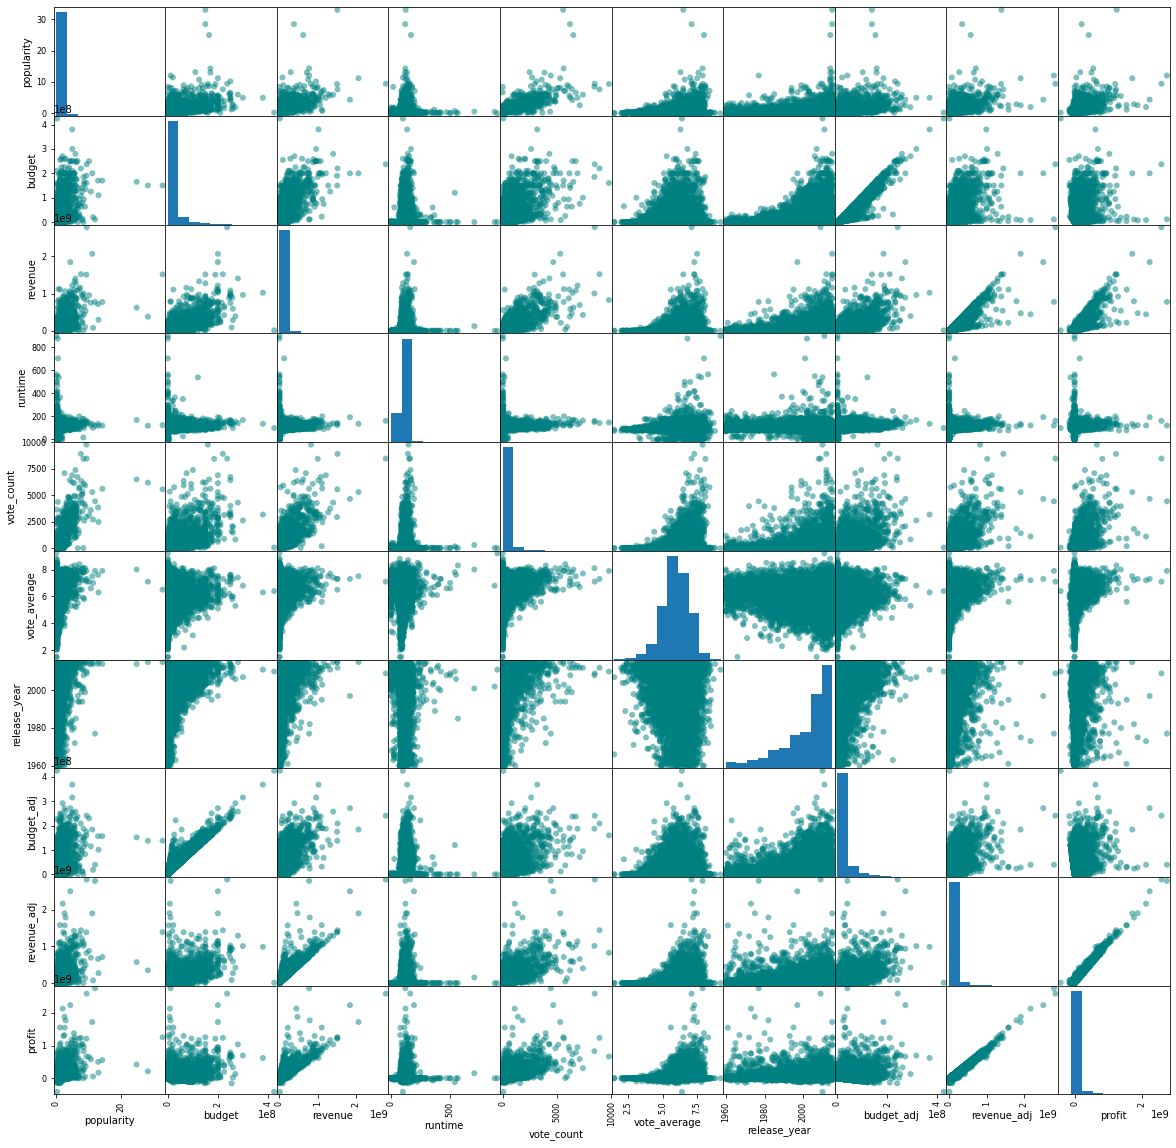

In [12]:
# Scatter Matrix can give us overview for the whole dataframe
pd.plotting.scatter_matrix(df,figsize=(20,20),grid=True, marker='o', color='teal');

### This graph(Scatter_Matrix) gives us overview for the whole dataset from which we can see:
##### -Popularity increases with vote count
##### -High Revenue is an indication for popuar movies

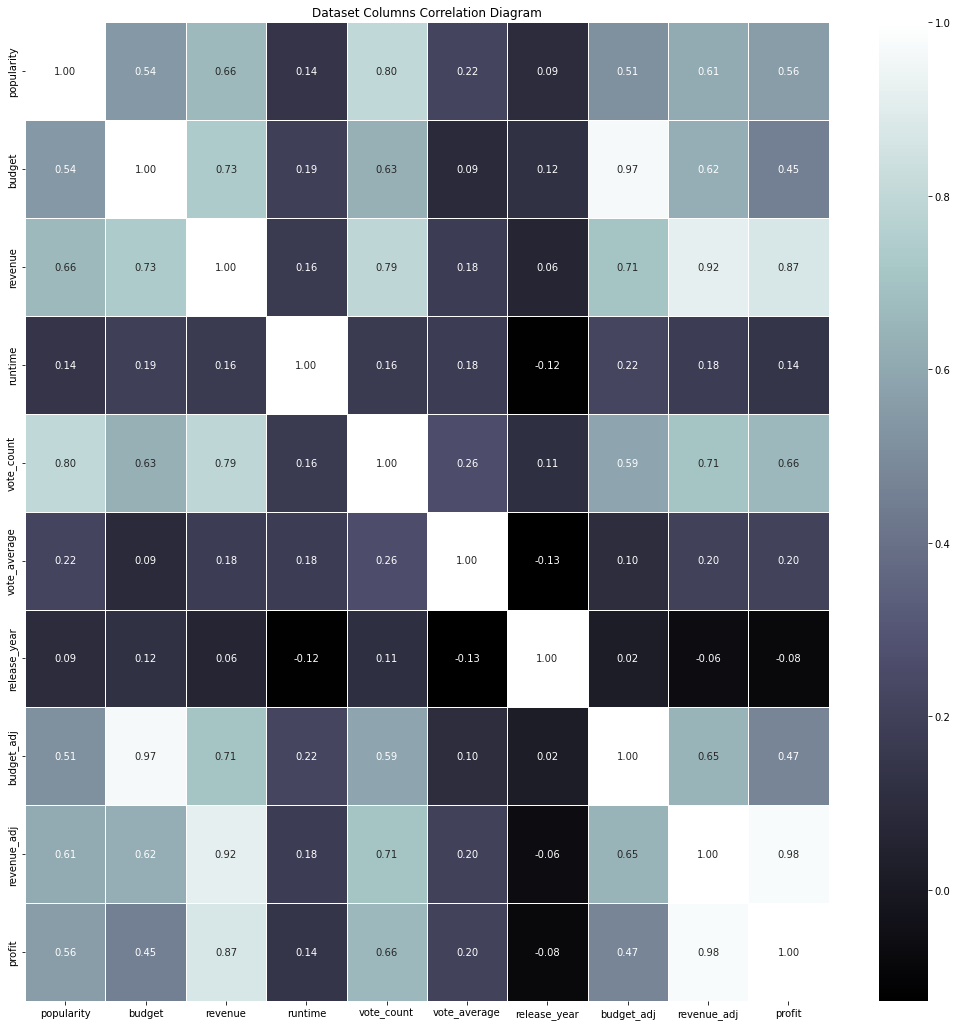

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
popularity,1.0,0.5,0.7,0.1,0.8,0.2,0.1,0.5,0.6,0.6
budget,0.5,1.0,0.7,0.2,0.6,0.1,0.1,1.0,0.6,0.5
revenue,0.7,0.7,1.0,0.2,0.8,0.2,0.1,0.7,0.9,0.9
runtime,0.1,0.2,0.2,1.0,0.2,0.2,-0.1,0.2,0.2,0.1
vote_count,0.8,0.6,0.8,0.2,1.0,0.3,0.1,0.6,0.7,0.7
vote_average,0.2,0.1,0.2,0.2,0.3,1.0,-0.1,0.1,0.2,0.2
release_year,0.1,0.1,0.1,-0.1,0.1,-0.1,1.0,0.0,-0.1,-0.1
budget_adj,0.5,1.0,0.7,0.2,0.6,0.1,0.0,1.0,0.6,0.5
revenue_adj,0.6,0.6,0.9,0.2,0.7,0.2,-0.1,0.6,1.0,1.0
profit,0.6,0.5,0.9,0.1,0.7,0.2,-0.1,0.5,1.0,1.0


In [13]:
# Displaying correlationtable and heatmap for the dataset
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), cmap = 'bone', annot=True, linewidths=.5, fmt= '.2f',ax=ax);
plt.title('Dataset Columns Correlation Diagram');
plt.show()
df.corr()

### The above heatmap confirm the same info we got from the scatter matrix above
### ==================================================

            popularity  vote_count
popularity         1.0         0.8
vote_count         0.8         1.0


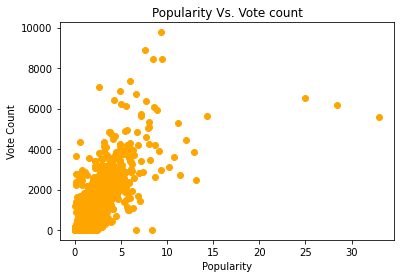

In [14]:
# plot for relation between 'Popularity' & 'Vote Count'
plt.scatter(x=df['popularity'], y=df['vote_count'], color='orange');
plt.title('Popularity Vs. Vote count');
plt.xlabel('Popularity');
plt.ylabel('Vote Count');
print(df[['popularity', 'vote_count']].corr());
plt.show()

### Above graph shows positive correlation between movie popularity and vote count
### =============================================

             popularity  revenue_adj
popularity          1.0          0.6
revenue_adj         0.6          1.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


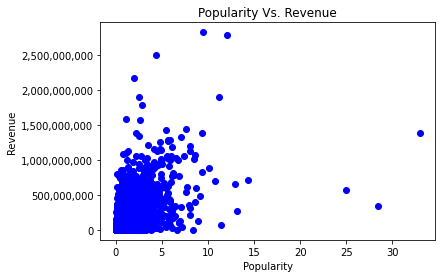

In [15]:
# plot for relation between 'Popularity' & 'Revenue_adj'
plt.scatter(x=df['popularity'], y=df['revenue_adj'], color='Blue');
plt.title('Popularity Vs. Revenue');
plt.xlabel('Popularity');
plt.ylabel('Revenue');
current_values = plt.gca().get_yticks();
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);
print(df[['popularity', 'revenue_adj']].corr())
plt.show()

### Above graph shows positive correlation between movie popularity and revenue_adj
### ==========================================

Average Vote count per movie is 220.
Maximum Vote count is 9767.
Minimum Vote count is 10.


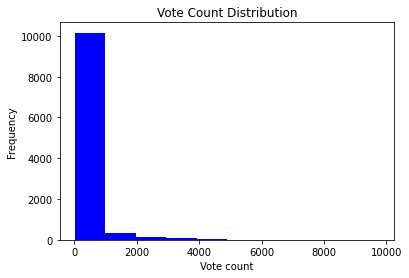

In [16]:
# Plotting histogram to check for average vote count freuency
df['vote_count'].plot(kind = 'hist', colormap="winter");
plt.title('Vote Count Distribution');
plt.xlabel('Vote count');
plt.ylabel('Frequency');
print('Average Vote count per movie is {:.0f}.'.format(df['vote_count'].mean()))
print('Maximum Vote count is {:.0f}.'.format(df['vote_count'].max()))
print('Minimum Vote count is {:.0f}.'.format(df['vote_count'].min()))
plt.show()

In [17]:
df[df['vote_count'] == 9767]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1919,9.4,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,9767,7.9,2010,160000000.0,825500000.0,665500000.0


### This Histogram shows that average vote count per movie is 217 whil maximum number of voters re 9767, also the movie with the highest numbers of voters have high average voting points which shows that as number of voters increase, the average vote increases.
### =====================================================

#### Q1. Which year has the highest number of movies released? To check for industry growth and any time trend.

The year with maximum number of movies is 2014 with 682 movie
The year with minimum number of movies is 1969 with 30 movie


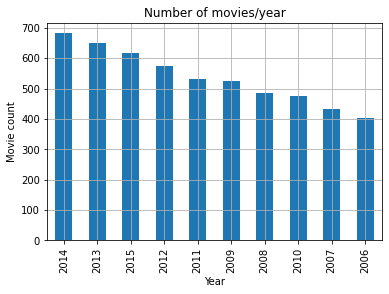

In [18]:
# Displaying and plotting the year with highest number of movies released
df['release_year'].value_counts()[:10].plot(kind='bar')
plt.title('Number of movies/year')
plt.xlabel('Year')
plt.ylabel('Movie count')
plt.grid()
##########
x = df['release_year'].value_counts().idxmax()
y = df['release_year'].value_counts().max()
print("The year with maximum number of movies is {} with {} movie".format(x, y))
x1 = df['release_year'].value_counts().idxmin()
y1 = df['release_year'].value_counts().min()
print("The year with minimum number of movies is {} with {} movie".format(x1, y1))
##########
plt.show()

### This graph depicts the highest 10 years for movies released per year and we notice they are all in sequence and recent which indicates that movie production is increasing with time.

#### Q2. What is average runtime of movies? To check if short movies or long movies are more popular

In [19]:
# Checking for average runtime for all the movies
print("The average runtime for movies is {:.0f} minutes".format(df['runtime'].mean()))

The average runtime for movies is 102 minutes


#### Q3. Which movies earned the highest and lowest profit?

In [20]:
# Movie with the maxium Profit
print("Movie with the maxium Profit:")
df.loc[df['profit'].idxmax()]

Movie with the maxium Profit:


popularity                                                     12.0
budget                                                     11000000
revenue                                                   775398007
original_title                                            Star Wars
cast              Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                               George Lucas
runtime                                                         121
genres                             Adventure|Action|Science Fiction
vote_count                                                     4428
vote_average                                                    7.9
release_year                                                   1977
budget_adj                                               39575591.4
revenue_adj                                            2789712242.3
profit                                                 2750136650.9
Name: 1329, dtype: object

In [21]:
# Movie with the minimum Profit
print("Movie with the minimum Profit:")
df.loc[df['profit'].idxmin()]

Movie with the minimum Profit:


popularity                                                      0.3
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
vote_count                                                       74
vote_average                                                    6.4
release_year                                                   2010
budget_adj                                              425000000.0
revenue_adj                                              11087569.0
profit                                                 -413912431.0
Name: 2244, dtype: object

#### Q4. Which movies earned the highest and lowest revenue?

In [22]:
# Movie with the maximum revenue
print("Movie with the maximum revenue:")
df.loc[df['revenue_adj'].idxmax()]

Movie with the maximum revenue:


popularity                                                      9.4
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
vote_count                                                     8458
vote_average                                                    7.1
release_year                                                   2009
budget_adj                                              240886902.9
revenue_adj                                            2827123750.4
profit                                                 2586236847.5
Name: 1386, dtype: object

In [23]:
# Movie with the minimum revenue
print("Movie with the minimum revenue:")
df.loc[df['revenue_adj'].idxmin()]

Movie with the minimum revenue:


popularity                                                      2.9
budget                                                     30000000
revenue                                                           0
original_title                                            Wild Card
cast              Jason Statham|Michael Angarano|Milo Ventimigli...
director                                                 Simon West
runtime                                                          92
genres                                         Thriller|Crime|Drama
vote_count                                                      481
vote_average                                                    5.3
release_year                                                   2015
budget_adj                                               27599987.9
revenue_adj                                                     0.0
profit                                                  -27599987.9
Name: 48, dtype: object

#### Q5. which movies were made with the highest and lowest budget?

In [24]:
# Movie with the maximum budget
print("Movie with the maximum budget:")
df.loc[df['budget_adj'].idxmax()]

Movie with the maximum budget:


popularity                                                      0.3
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
vote_count                                                       74
vote_average                                                    6.4
release_year                                                   2010
budget_adj                                              425000000.0
revenue_adj                                              11087569.0
profit                                                 -413912431.0
Name: 2244, dtype: object

In [25]:
# Movie with the minimum budget
print("Movie with the minimum budget:")
df.loc[df['budget_adj'].idxmin()]

Movie with the minimum budget:


popularity                                                      3.9
budget                                                            0
revenue                                                    29355203
original_title                                           Mr. Holmes
cast              Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director                                                Bill Condon
runtime                                                         103
genres                                                Mystery|Drama
vote_count                                                      425
vote_average                                                    6.4
release_year                                                   2015
budget_adj                                                      0.0
revenue_adj                                              27006774.9
profit                                                   27006774.9
Name: 30, dtype: object

#### Q6. Which year sees the maximum profit earned by all the movies released in it? to see the trend in movie industry by profit

The year with maximum profit is 2015 with 17632622966.
The year with minimum profit is 1966 with 182608330.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


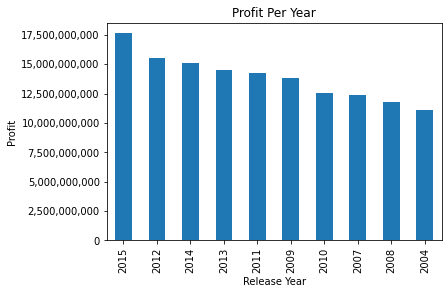

In [26]:
# Checking for the most profitable year
df.groupby('release_year')['profit'].sum().sort_values(ascending=False)[:10].plot(kind = 'bar');
plt.title('Profit Per Year');
plt.xlabel('Release Year');
plt.ylabel('Profit');
current_values = plt.gca().get_yticks();
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);
############
x = df.groupby('release_year')['profit'].sum().idxmax()
y = df.groupby('release_year')['profit'].sum().max()
print("The year with maximum profit is {} with {:.0f}.".format(x, y))
x1 = df.groupby('release_year')['profit'].sum().idxmin()
y1 = df.groupby('release_year')['profit'].sum().min()
print("The year with minimum profit is {} with {:.0f}.".format(x1, y1))
############
plt.show()

### The above graph shows that maximum profitable year is 2015 which is also among the highest years in movie production and the least profitable year is 1966.

#### Q7. What kind of movie genre is made the most? To check for the most produced genre which implies the most wanted and accepted genre by the audience

In [27]:
# Extracting each genre from 'genres' column as most movies have mixed genres using for loop and string methods
list1 = []
for i in range (df.shape[0]):
    Genre = str(df['genres'].iloc[i]).strip('[]').replace('|', ',').split(',')
    for item in Genre:
        list1.append(item)
    i +=1

The most common genre is: 
 Drama       4747
Comedy      3775
Thriller    2903
Action      2377
Romance     1708
dtype: int64


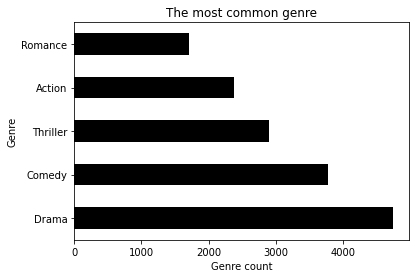

In [28]:
# Plotting genres in column chart to check for the most common genre
pd.Series(list1).value_counts()[:5].plot(kind = 'barh', color='black');
plt.title('The most common genre');
plt.xlabel('Genre count');
plt.ylabel('Genre');
print("The most common genre is: \n", pd.Series(list1).value_counts()[:5])
plt.show()

### From the above bar plot we see that drama is the most common genre with 4747 movies followed by comedy and thriller.

#### Q8. Which actor appered in maximum number of films? To check for actors popularity

In [29]:
# Extracting Actors names from 'cast' column using for loop and string methods to find actors with highest appearences
list2 = []
for i in range (df.shape[0]):
    Genre = str(df['cast'].iloc[i]).strip('[]').replace('|', ',').split(',')
    for item in Genre:
        list2.append(item)
    i +=1

Actors with most appearences are: 
 Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
dtype: int64


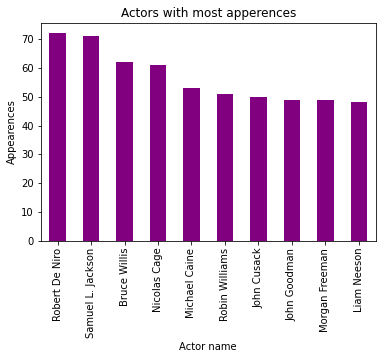

In [30]:
# Plotting actors names in column chart
pd.Series(list2).value_counts()[:10].plot(kind = 'bar', color='purple');
plt.title('Actors with most apperences');
plt.xlabel('Actor name');
plt.ylabel('Appearences');
print("Actors with most appearences are: \n", pd.Series(list2).value_counts()[:10])
plt.show()

### The actors with most apperences are: Robert De Niro, Samuel L. Jackson and Bruce Willis which implies that these are the most popular actors. 

#### Q9. Which director has the maximum number of films?

Directors with highest number of movies are: 
 Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      28
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Name: director, dtype: int64


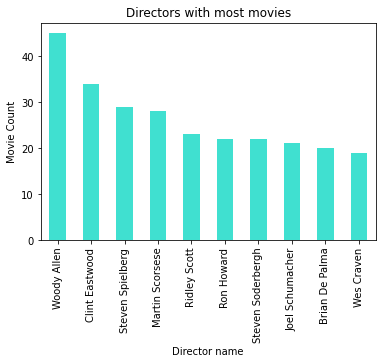

In [31]:
# A plot showing directors with most number of movies
df['director'].value_counts()[:10].plot(kind = 'bar', color='turquoise');
plt.title('Directors with most movies');
plt.xlabel('Director name');
plt.ylabel('Movie Count');
print("Directors with highest number of movies are: \n", df['director'].value_counts()[:10])

### Directors with highest number of movies directed are: Woody Allen, Clint Eastwood and Steven Spielberg

#### Q10. Which directors have the highest average rating?

Directors with the highest average rating are: 
 director
Mark Cousins                                  9.2
David Mallet                                  8.7
Saul Swimmer                                  8.5
Curt Morgan                                   8.5
Martin Scorsese|Michael Henry Wilson          8.5
Jorge RamÃ­rez SuÃ¡rez                        8.4
D.A. Pennebaker|David Dawkins|Chris Hegedus   8.4
Anthony Mandler                               8.4
Sam Dunn|Scot McFadyen                        8.4
Andy Saunders                                 8.3
Name: vote_average, dtype: float64


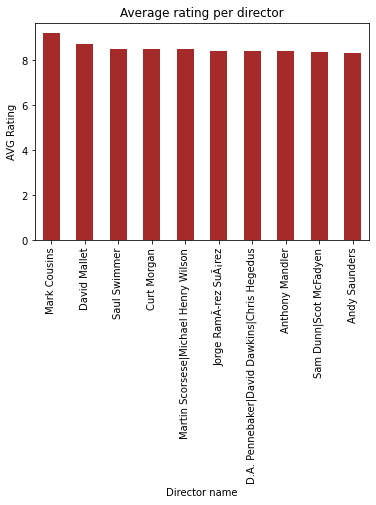

In [32]:
# Sorting directors by average rating for their movies
df.groupby('director')['vote_average'].mean().sort_values(ascending=False)[:10].plot(kind='bar', color='brown');
plt.title('Average rating per director');
plt.xlabel('Director name');
plt.ylabel('AVG Rating');
print("Directors with the highest average rating are: \n", df.groupby('director')['vote_average'].mean().sort_values(ascending=False)[:10])

### From the above 2 graphs we see that directors with the highest number of movies are different from those with the highest average rating which 

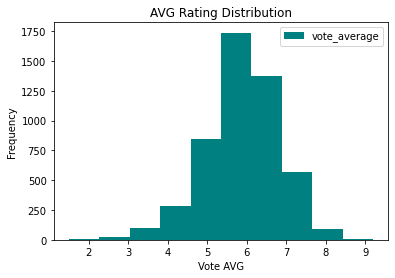

In [33]:
df[['director', 'vote_average']].groupby('director').mean().sort_values('vote_average', ascending=False).plot(kind = 'hist', color='teal');
plt.title('AVG Rating Distribution');
plt.xlabel('Vote AVG');
plt.ylabel('Frequency');

#### This histogram shows that average rating per director is around '6'

#### Q11. What is the average rating per year?

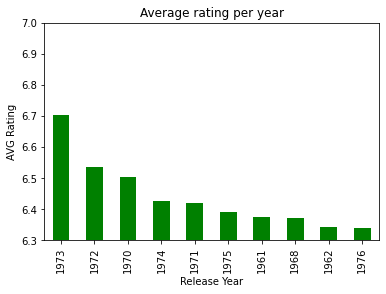

In [34]:
df.groupby('release_year')['vote_average'].mean().sort_values(ascending=False)[:10].plot(kind='bar', color="Green");
plt.title('Average rating per year');
plt.xlabel('Release Year');
plt.ylabel('AVG Rating');
plt.ylim(6.3, 7);

## Conclusions
#### 1. 2014 has the highest number of released movies by 518 movie.
#### 2. Average runtime of movies is 103 minutes.
#### 3. 'Star Wars' earned the highest profit while 'The Warriors Way' earned the least profit.
#### 4. 'Avatar' had the highest revenue and 'Wild Card' had the least revenue.
#### 5. 'The Warriors Way' had the maximum budget and 'Mr. Holmes' had the least budget.
#### 6. 2015 had the maximum profit from all movies released.
#### 7. Drama, Comedy and Thrillet are the most produced genre of all time.
#### 8. Robert De Niro, Samuel L. Jackson and Bruce Willis appeared te most among other actors.
#### 9. 'Woody Allen' has directed the maximum number of movies by 45 movie.
#### 10. Director 'Mark Cousins' has the highest average rating by 9.2 points.
#### 11. 1973 has the highest average rating per year.

# ============================

## Limitations
#### * The Budget and revenue columns doesn't have currency information which could help specially with currency exchange rate fluctuation.
#### * Dropped rows with NaN values could had key data which may have affected the analysis process.
#### * Other crew members other than cast and directors are not included.